Recognizing CIFAR-10 images with Data Augmentation

CIFAR-10 dataset contains 60,000 color images of size 32*32 pixels which are divided in 10 classes. We will use Keras library to import the dataset which contains 50,000 images as training iamges and 10,000 as test images

In Part I, we used a simple Convolutional Neural Network model with only one hidden layer. Model gave accuracy of 66.94% on test data. In Part 2,we improved the accuracy further to 78.65 by increasing the number of convolutional layers.

Goal of this part is to improve the accuracy of the model by using data augmentation like horizontal flip, zooming, etc.

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt

In [3]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [16]:
BATCH_SIZE = 128
nb_epochs = 10
VALIDATION_SPLIT = 0.2
num_classes = 10

In [6]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [5]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [7]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

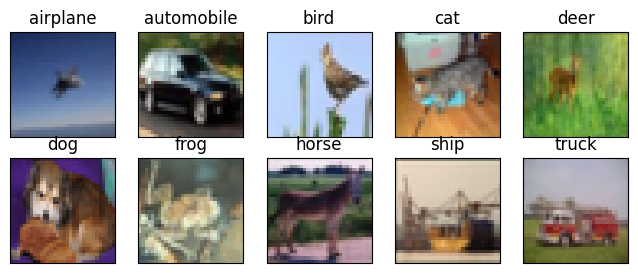

In [8]:
fig = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = fig.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()

In [9]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [10]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
# Network
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    # Adding more layers to improve the model
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [13]:
model = create_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [17]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs,
          validation_split = VALIDATION_SPLIT, verbose = 1)


Epoch 1/10
313/313 [==============================] - 157s 502ms/step - loss: 0.9739 - accuracy: 0.6580 - val_loss: 0.9164 - val_accuracy: 0.6792
Epoch 2/10
313/313 [==============================] - 156s 498ms/step - loss: 0.8696 - accuracy: 0.6975 - val_loss: 0.8332 - val_accuracy: 0.7088
Epoch 3/10
313/313 [==============================] - 158s 505ms/step - loss: 0.7941 - accuracy: 0.7213 - val_loss: 0.7462 - val_accuracy: 0.7373
Epoch 4/10
313/313 [==============================] - 158s 504ms/step - loss: 0.7325 - accuracy: 0.7422 - val_loss: 0.7830 - val_accuracy: 0.7350
Epoch 5/10
313/313 [==============================] - 157s 502ms/step - loss: 0.6805 - accuracy: 0.7616 - val_loss: 0.7025 - val_accuracy: 0.7558
Epoch 6/10
313/313 [==============================] - 157s 502ms/step - loss: 0.6322 - accuracy: 0.7807 - val_loss: 0.7144 - val_accuracy: 0.7571
Epoch 7/10
313/313 [==============================] - 156s 500ms/step - loss: 0.5937 - accuracy: 0.7940 - val_loss: 0.7240 -

In [18]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


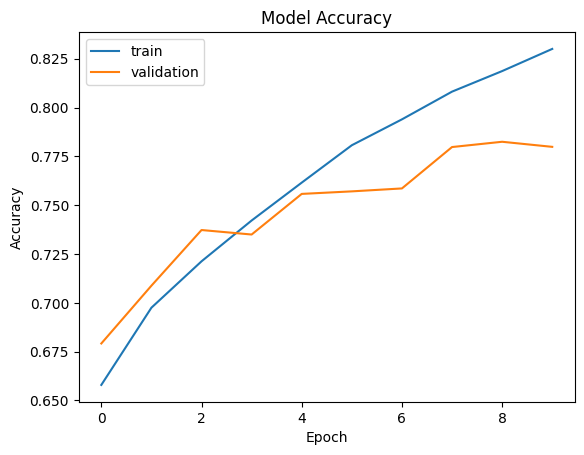

In [20]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

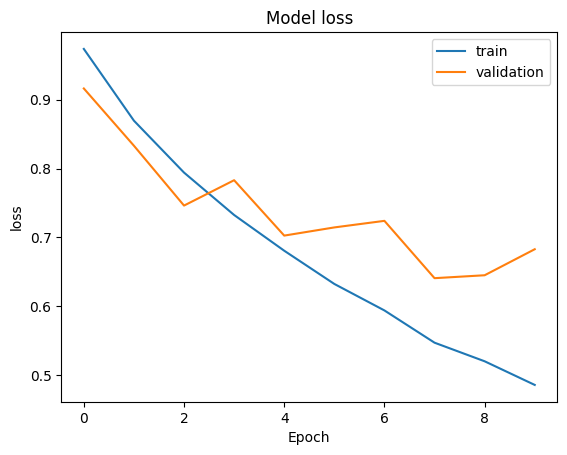

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [22]:
score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

79/79 [==============================] - 8s 99ms/step - loss: 0.7068 - accuracy: 0.7691


In [23]:
print("Test Loss", score[0])
print("Test accuracy", score[1])

Test Loss 0.7068257331848145
Test accuracy 0.76910001039505


In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# load dataset
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Augmenting training set images
datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True)
datagen.fit(X_train)

In [26]:
model_aug = create_cnn_model()
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [27]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
import h5py as h5py

In [28]:
lr = 0.01
def learning_rate_decay(epoch):
    return lr * (0.1 ** int(epoch / 10))

In [31]:
model_history = model_aug.fit_generator(datagen.flow(X_train, y_train,
                                                     batch_size = BATCH_SIZE),
                                        steps_per_epoch = X_train.shape[0] / BATCH_SIZE,
                                        epochs = 2, verbose = 1,
                                        validation_data = (X_test, y_test),
                                        callbacks = [ModelCheckpoint('model_aug.h5', save_best_only =True),
                                                     EarlyStopping(monitor='val_acc', min_delta=0.000001, patience=2, \
                                                     verbose=1, mode='auto')])

<ipython-input-31-bb26fe119f52>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model_aug.fit_generator(datagen.flow(X_train, y_train,


Epoch 1/2
391/390 [==============================] - ETA: 0s - loss: 1.6368 - accuracy: 0.4093

390/390 [==============================] - 210s 538ms/step - loss: 1.6368 - accuracy: 0.4093 - val_loss: 1.3096 - val_accuracy: 0.5395
Epoch 2/2
391/390 [==============================] - ETA: 0s - loss: 1.3181 - accuracy: 0.5315

390/390 [==============================] - 206s 527ms/step - loss: 1.3181 - accuracy: 0.5315 - val_loss: 1.0766 - val_accuracy: 0.6166


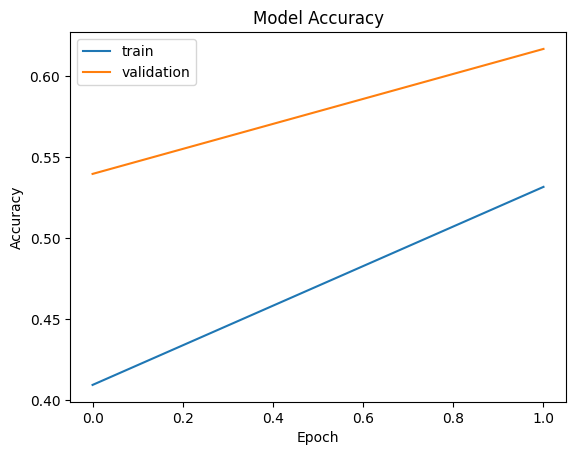

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

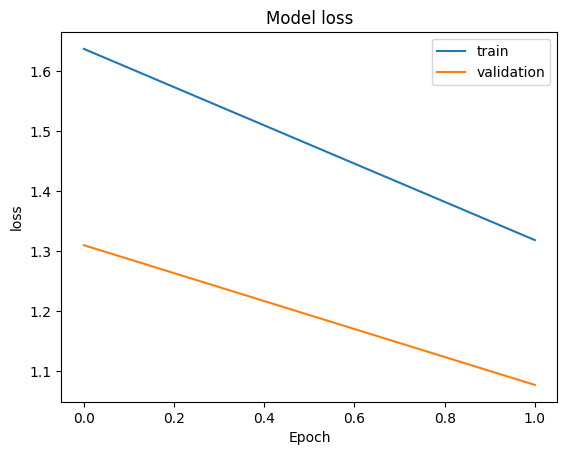

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [36]:
score = model_aug.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

79/79 [==============================] - 9s 109ms/step - loss: 1.0766 - accuracy: 0.6166


In [37]:
print("Test Loss", score[0])
print("Test accuracy", score[1])

Test Loss 1.0766435861587524
Test accuracy 0.616599977016449
